**Завдвання:**

Створіть свій датасет на основі випадкових даних за допомогою numpy.linspace, та проведіть на ньому лінійну регресію, використовуючи інструменти tensorflow.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tfc

In [2]:
x = np.linspace(0, 100, 100)
y = np.linspace(0, 100, 100)

In [3]:
x += np.random.uniform(-10, 10, 100)
y += np.random.uniform(-10, 10, 100)

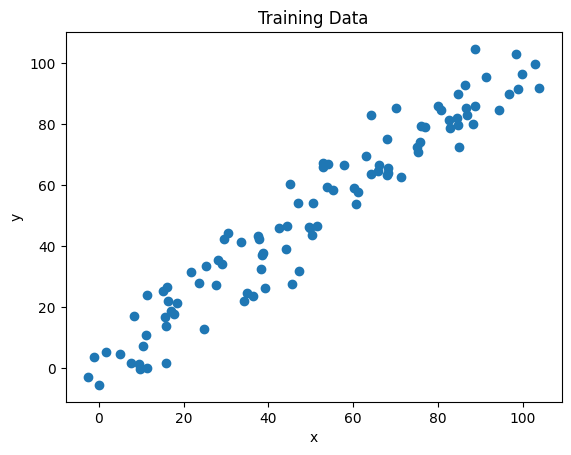

In [4]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training Data")
plt.show()

In [5]:
tfc.disable_eager_execution()

In [6]:
X = tfc.placeholder("float")
Y = tfc.placeholder("float")
W = tf.Variable(np.random.randn(), name = "W")
b = tf.Variable(np.random.randn(), name = "b")

In [7]:
learning_rate = 0.01
training_epochs = 1000

In [8]:
y_pred = tf.add(tf.multiply(X, W), b)
 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * len(x))
 
optimizer_gradient = tfc.train.GradientDescentOptimizer(learning_rate).minimize(cost)
 
init = tfc.global_variables_initializer()

In [9]:
with tfc.Session() as sess:
     
    sess.run(init)
     
    for epoch in range(training_epochs):
         
        for (_x, _y) in zip(x, y):
            sess.run(optimizer_gradient, feed_dict = {X : _x, Y : _y})
         
        if (epoch + 1) % 50 == 0:
            c = sess.run(cost, feed_dict = {X : x, Y : y})
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))
     
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y})
    weight = sess.run(W)
    bias = sess.run(b)

Epoch 50 : cost = 32.246586 W = 0.95460504 b = 0.89559436
Epoch 100 : cost = 32.12638 W = 0.95251906 b = 1.1040343
Epoch 150 : cost = 32.02837 W = 0.9505948 b = 1.2963209
Epoch 200 : cost = 31.948915 W = 0.9488195 b = 1.4737109
Epoch 250 : cost = 31.884935 W = 0.9471818 b = 1.6373585
Epoch 300 : cost = 31.833855 W = 0.94567096 b = 1.788327
Epoch 350 : cost = 31.793486 W = 0.9442772 b = 1.9275969
Epoch 400 : cost = 31.761986 W = 0.94299144 b = 2.0560756
Epoch 450 : cost = 31.737822 W = 0.9418054 b = 2.174592
Epoch 500 : cost = 31.719696 W = 0.9407112 b = 2.2839293
Epoch 550 : cost = 31.70651 W = 0.9397018 b = 2.384798
Epoch 600 : cost = 31.697374 W = 0.93877053 b = 2.4778464
Epoch 650 : cost = 31.691504 W = 0.9379115 b = 2.56368
Epoch 700 : cost = 31.68827 W = 0.93711895 b = 2.6428804
Epoch 750 : cost = 31.687143 W = 0.93638784 b = 2.7159426
Epoch 800 : cost = 31.687687 W = 0.9357135 b = 2.7833254
Epoch 850 : cost = 31.689543 W = 0.935091 b = 2.8455198
Epoch 900 : cost = 31.692392 W = 0

In [10]:
predictions = weight * x + bias
print("Training cost =", 
      training_cost, 
      "Weight =", weight, 
      "bias =", bias, '\n')

Training cost = 31.700151 Weight = 0.9334993 bias = 3.004576 



In [11]:
predictions[:10]

array([ 3.04152313,  1.96511977,  0.66605238,  4.54433711, 12.73577282,
       12.04374563, 17.77724575, 11.85778658, 13.53263316, 10.07513462])

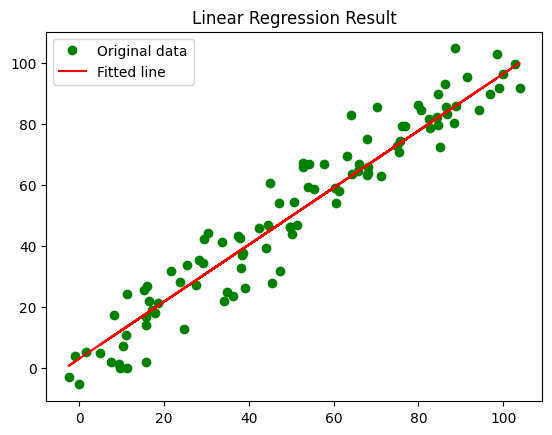

In [12]:
plt.plot(x, y, 'go', label ='Original data')
plt.plot(x, predictions, label ='Fitted line', c='r')
plt.title('Linear Regression Result')
plt.legend()
plt.show()

In [13]:
mae = np.mean(np.abs(y - predictions))
mse = np.square(np.subtract(y,predictions)).mean()
rmse = mse**0.5
r2 = 1-(mse/np.var(y))

print(f'MAE : {mae:.2f}')
print(f'MSE : {mse:.2f}')
print(f'RMSE : {rmse:.2f}')
print(f'R^2 : {r2:.2f}')

MAE : 6.26
MSE : 63.40
RMSE : 7.96
R^2 : 0.93
